# RSVP Simulations

This Python code simulates a dynamic system within the RSVP (Relativistic Scalar Vector Plenum) framework, modeling the evolution of a scalar field (Phi), a vector field (v), and an entropy field (S) on a 50x50 2D grid over 100 time steps.

The fields interact through diffusion, advection, and gradient-based updates, simulating processes like neural adaptation or information flow. 

The simulation computes a coherence metric (φ_RSVP) to quantify emergent order and a topological analysis to count connected regions in the entropy field, indicating pattern complexity. Results are visualized through plots of coherence and topological features over time, with an optional parameter sweep for varying diffusion coefficients.

The final entropy field is displayed as a static heatmap.

In [16]:
%matplotlib notebook

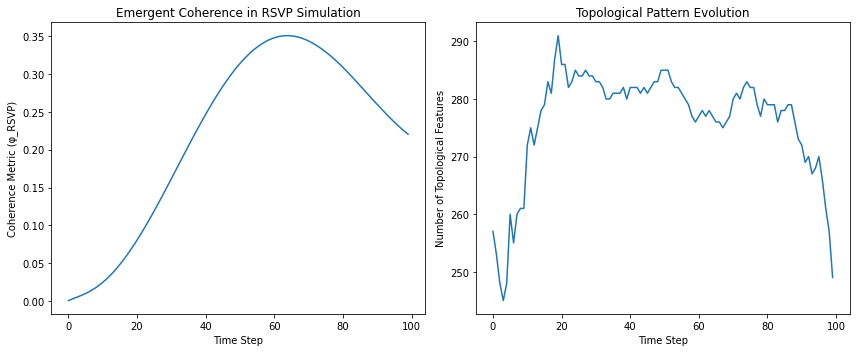

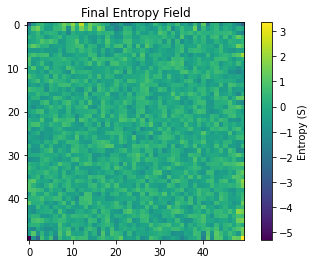

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Parameters for RSVP simulation
grid_size = 50  # Size of 2D lattice
steps = 100     # Number of time steps
D = 0.1         # Diffusion coefficient for entropy
eta = 0.05      # Learning rate for vector field update
gamma = 0.8     # Memory retention factor for entropy
dt = 0.1        # Time step
param_sweep = False  # Toggle parameter sweep

# Initialize fields (RSVP context: scalar, vector, entropy fields)
# Phi: Scalar field representing latent potential or semantic intensity
# v: Vector field representing directed tendencies (agency, flow)
# S: Entropy field representing uncertainty or possibility space
Phi = np.random.rand(grid_size, grid_size)
v = np.random.randn(grid_size, grid_size, 2) * 0.1
S = np.ones((grid_size, grid_size)) * 0.5

# Simulation functions
def compute_divergence(v):
    """Compute divergence of vector field (net flow in/out)."""
    div_v = np.gradient(v[:, :, 0])[0] + np.gradient(v[:, :, 1])[1]
    return div_v

def update_entropy(S, v, Phi, D, dt, gamma, t):
    """Update entropy field based on RSVP dynamics.
    Includes diffusion, advection, source, and recursive memory.
    S_t = gamma * S_(t-1) + (1-gamma) * (div_v contribution)."""
    div_v = compute_divergence(v)
    diffusion = D * (np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
                     np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S)
    source = np.abs(Phi) * np.linalg.norm(v, axis=2)
    S_new = S + dt * (diffusion - div_v * S + source)
    if t > 0:  # Apply recursive memory
        S_new = gamma * S + (1 - gamma) * (-div_v)
    return S_new

def update_vector_field(v, Phi, eta):
    """Update vector field with synaptic-like plasticity.
    v adjusts to gradient of Phi, mimicking neural adaptation."""
    grad_Phi = np.array(np.gradient(Phi))
    return v + eta * grad_Phi.transpose(1, 2, 0)

def coherence_metric(Phi, v, S):
    """Compute RSVP coherence metric (phi_RSVP).
    Quantifies emergent order via coupling of flow (div_v) and entropy gradient."""
    div_v = compute_divergence(v)
    grad_S = np.sqrt(np.gradient(S)[0]**2 + np.gradient(S)[1]**2)
    return np.mean(np.abs(div_v) * grad_S)

def topological_analysis(S):
    """Basic topological analysis to detect emergent patterns.
    Counts connected regions in entropy field above threshold."""
    threshold = np.mean(S) + np.std(S)
    binary = S > threshold
    labeled_array, num_features = label(binary)
    return num_features

# Simulation function
def run_simulation(D, eta, gamma, dt):
    Phi_t = Phi.copy()
    v_t = v.copy()
    S_t = S.copy()
    coherence_values = []
    topological_features = []
    
    for t in range(steps):
        S_t = update_entropy(S_t, v_t, Phi_t, D, dt, gamma, t)
        v_t = update_vector_field(v_t, Phi_t, eta)
        Phi_t = Phi_t + 0.01 * compute_divergence(v_t)
        coherence = coherence_metric(Phi_t, v_t, S_t)
        coherence_values.append(coherence)
        topological_features.append(topological_analysis(S_t))
    
    return coherence_values, topological_features, S_t

# Parameter sweep or single run
if param_sweep:
    D_values = [0.05, 0.1, 0.2]
    results = []
    for D in D_values:
        coherence_vals, topo_feats, _ = run_simulation(D, eta, gamma, dt)
        results.append((D, coherence_vals, topo_feats))
    
    # Plot parameter sweep
    plt.figure(figsize=(10, 5))
    for D, coherence_vals, topo_feats in results:
        plt.plot(coherence_vals, label=f'D={D}')
    plt.xlabel("Time Step")
    plt.ylabel("Coherence Metric (φ_RSVP)")
    plt.title("Coherence Across Diffusion Coefficients")
    plt.legend()
    plt.show()
else:
    coherence_vals, topo_feats, final_S = run_simulation(D, eta, gamma, dt)
    
    # Plot coherence and topological features
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(coherence_vals)
    plt.xlabel("Time Step")
    plt.ylabel("Coherence Metric (φ_RSVP)")
    plt.title("Emergent Coherence in RSVP Simulation")
    
    plt.subplot(1, 2, 2)
    plt.plot(topo_feats)
    plt.xlabel("Time Step")
    plt.ylabel("Number of Topological Features")
    plt.title("Topological Pattern Evolution")
    plt.tight_layout()
    plt.show()
    
    # Visualize final entropy field
    plt.imshow(final_S, cmap='viridis')
    plt.colorbar(label='Entropy (S)')
    plt.title("Final Entropy Field")
    plt.show()

Results are visualized via plots of coherence and topological features over time, with an interactive Matplotlib slider allowing exploration of the entropy field’s spatial evolution, revealing how initial randomness transitions to structured patterns in a complex system.

<IPython.core.display.Javascript object>


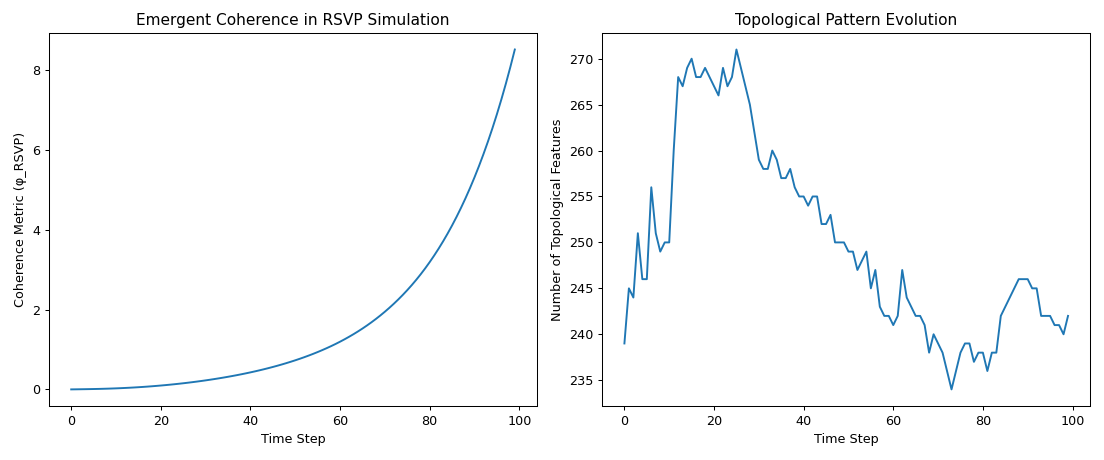

<IPython.core.display.Javascript object>


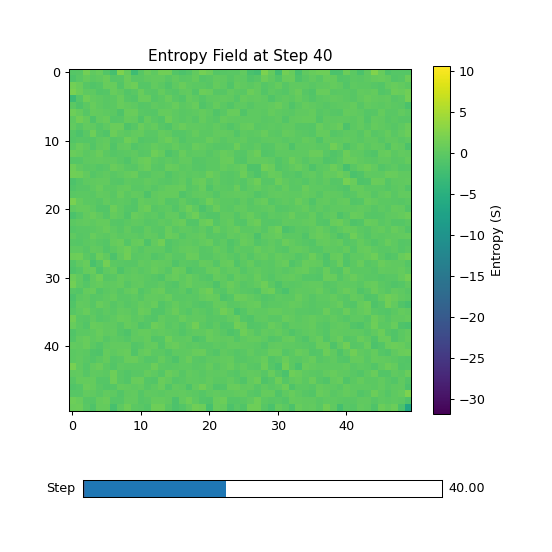

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from matplotlib.widgets import Slider

# Parameters
grid_size = 50
steps = 100
D = 0.1
eta = 0.05
gamma = 0.8
dt = 0.1

Phi = np.random.rand(grid_size, grid_size)
v = np.random.randn(grid_size, grid_size, 2) * 0.1
S = np.ones((grid_size, grid_size)) * 0.5

def compute_divergence(v):
    # v[..., 0]: x-component, v[..., 1]: y-component
    dvx_dx = np.gradient(v[..., 0], axis=0)
    dvy_dy = np.gradient(v[..., 1], axis=1)
    return dvx_dx + dvy_dy

def update_entropy(S, v, Phi, D, dt, gamma, t):
    div_v = compute_divergence(v)
    diffusion = D * (np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
                     np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S)
    source = np.abs(Phi) * np.linalg.norm(v, axis=2)
    S_new = S + dt * (diffusion - div_v * S + source)
    if t > 0:
        S_new = gamma * S + (1 - gamma) * (-div_v)
    return S_new

def update_vector_field(v, Phi, eta):
    grad_Phi_y, grad_Phi_x = np.gradient(Phi)  # Note: numpy gradient returns [axis0, axis1]: [y, x]
    grad_Phi = np.stack([grad_Phi_x, grad_Phi_y], axis=-1)
    return v + eta * grad_Phi

def coherence_metric(Phi, v, S):
    div_v = compute_divergence(v)
    grad_S_y, grad_S_x = np.gradient(S)
    grad_S = np.sqrt(grad_S_x**2 + grad_S_y**2)
    return np.mean(np.abs(div_v) * grad_S)

def topological_analysis(S):
    threshold = np.mean(S) + np.std(S)
    binary = S > threshold
    labeled_array, num_features = label(binary)
    return num_features

def run_simulation(D, eta, gamma, dt):
    Phi_t = Phi.copy()
    v_t = v.copy()
    S_t = S.copy()
    coherence_values = []
    topological_features = []
    S_history = [S_t.copy()]
    for t in range(steps):
        S_t = update_entropy(S_t, v_t, Phi_t, D, dt, gamma, t)
        v_t = update_vector_field(v_t, Phi_t, eta)
        Phi_t = Phi_t + 0.01 * compute_divergence(v_t)
        coherence = coherence_metric(Phi_t, v_t, S_t)
        coherence_values.append(coherence)
        topological_features.append(topological_analysis(S_t))
        S_history.append(S_t.copy())
    return coherence_values, topological_features, S_history

coherence_vals, topo_feats, S_history = run_simulation(D, eta, gamma, dt)

# Plot metrics (optional)
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(coherence_vals)
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Coherence Metric (φ_RSVP)")
ax1.set_title("Emergent Coherence in RSVP Simulation")
ax2.plot(topo_feats)
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Number of Topological Features")
ax2.set_title("Topological Pattern Evolution")
plt.tight_layout()
plt.show()

# Interactive slider for entropy field
fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.25)
im = ax.imshow(S_history[0], cmap='viridis', vmin=np.min(S_history), vmax=np.max(S_history))
cbar = plt.colorbar(im, ax=ax, label='Entropy (S)')
ax.set_title("Entropy Field at Step 0")

ax_slider = plt.axes([0.15, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Step', 0, steps, valinit=0, valstep=1)

def update(val):
    step = int(slider.val)
    im.set_data(S_history[step])
    ax.set_title(f"Entropy Field at Step {step}")
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

Advection is the process by which a physical or abstract quantity, such as mass, heat, or entropy, is transported across a medium due to the bulk motion of a vector field, such as a fluid flow or a directed tendency.

In the RSVP simulation, advection is modeled in the `update_entropy` function through the term `-div_v * S`, where `div_v` is the divergence of the vector field `v` and `S` is the entropy field. This term represents how the entropy is carried along the flow defined by `v`, with the divergence indicating regions where the flow converges (sinks) or diverges (sources), modulating the local entropy.

Mathematically, advection is described by the term `(v · ∇)S` in the advection-diffusion equation, but in the discrete implementation, it is approximated using the divergence to capture the net effect of transport, influencing the spatial redistribution of entropy in the system.

<IPython.core.display.Javascript object>


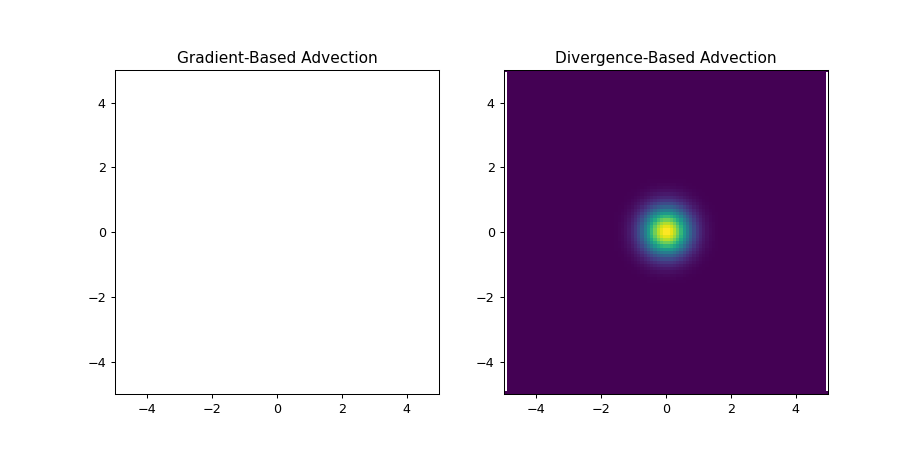

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Grid setup
nx, ny = 100, 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial entropy field (Gaussian blob)
S = np.exp(-(X**2 + Y**2) / 0.5)

# Vector field (rotational flow)
vx = -Y
vy = X

# Compute divergence of v
div_v = (np.roll(vx, -1, axis=0) - np.roll(vx, 1, axis=0)) / (2 * dx) + \
        (np.roll(vy, -1, axis=1) - np.roll(vy, 1, axis=1)) / (2 * dy)

# Time-stepping parameters
dt = 0.01
n_steps = 100

# Arrays to store entropy evolution
S_gradient = S.copy()
S_divergence = S.copy()

# Function to compute gradient-based advection
def advect_gradient(S, vx, vy):
    dS_dx = (np.roll(S, -1, axis=0) - np.roll(S, 1, axis=0)) / (2 * dx)
    dS_dy = (np.roll(S, -1, axis=1) - np.roll(S, 1, axis=1)) / (2 * dy)
    return - (vx * dS_dx + vy * dS_dy)

# Function to compute divergence-based advection
def advect_divergence(S, div_v):
    return - div_v * S

# Animation setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
im1 = ax1.imshow(S_gradient, extent=(-5, 5, -5, 5), cmap='viridis')
im2 = ax2.imshow(S_divergence, extent=(-5, 5, -5, 5), cmap='viridis')
ax1.set_title('Gradient-Based Advection')
ax2.set_title('Divergence-Based Advection')

def update(frame):
    global S_gradient, S_divergence
    # Update entropy fields
    S_gradient += dt * advect_gradient(S_gradient, vx, vy)
    S_divergence += dt * advect_divergence(S_divergence, div_v)
    # Update plots
    im1.set_array(S_gradient)
    im2.set_array(S_divergence)
    return [im1, im2]

# Create animation
ani = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


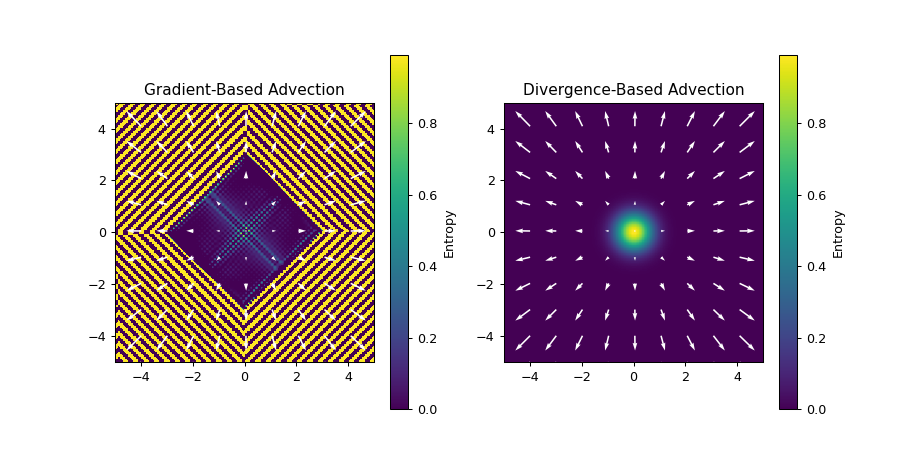

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Grid setup
nx, ny = 100, 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial entropy field (Gaussian blob)
S = np.exp(-(X**2 + Y**2) / 0.5)

# Vector field (divergent flow: v = [x, y])
vx = X
vy = Y

# Compute divergence of v
div_v = (np.roll(vx, -1, axis=0) - np.roll(vx, 1, axis=0)) / (2 * dx) + \
        (np.roll(vy, -1, axis=1) - np.roll(vy, 1, axis=1)) / (2 * dy)

# Time-stepping parameters
dt = 0.005  # Reduced for numerical stability
n_steps = 200  # Increased for visible evolution

# Arrays to store entropy evolution
S_gradient = S.copy()
S_divergence = S.copy()

# Function to compute gradient-based advection (unchanged)
def advect_gradient(S, vx, vy):
    dS_dx = (np.roll(S, -1, axis=0) - np.roll(S, 1, axis=0)) / (2 * dx)
    dS_dy = (np.roll(S, -1, axis=1) - np.roll(S, 1, axis=1)) / (2 * dy)
    return - (vx * dS_dx + vy * dS_dy)

# Function to compute divergence-based advection
def advect_divergence(S, div_v):
    return - div_v * S

# Animation setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
vmin, vmax = 0, np.max(S)  # Normalize colormap for visibility
im1 = ax1.imshow(S_gradient, extent=(-5, 5, -5, 5), cmap='viridis', vmin=vmin, vmax=vmax)
im2 = ax2.imshow(S_divergence, extent=(-5, 5, -5, 5), cmap='viridis', vmin=vmin, vmax=vmax)
ax1.set_title('Gradient-Based Advection')
ax2.set_title('Divergence-Based Advection')
fig.colorbar(im1, ax=ax1, label='Entropy')
fig.colorbar(im2, ax=ax2, label='Entropy')

# Overlay vector field (subsampled for clarity)
skip = 10  # Subsample vectors
ax1.quiver(X[::skip, ::skip], Y[::skip, ::skip], vx[::skip, ::skip], vy[::skip, ::skip], color='white')
ax2.quiver(X[::skip, ::skip], Y[::skip, ::skip], vx[::skip, ::skip], vy[::skip, ::skip], color='white')

def update(frame):
    global S_gradient, S_divergence
    # Update entropy fields
    S_gradient += dt * advect_gradient(S_gradient, vx, vy)
    S_divergence += dt * advect_divergence(S_divergence, div_v)
    # Update plots
    im1.set_array(S_gradient)
    im2.set_array(S_divergence)
    return [im1, im2]

# Create animation
ani = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


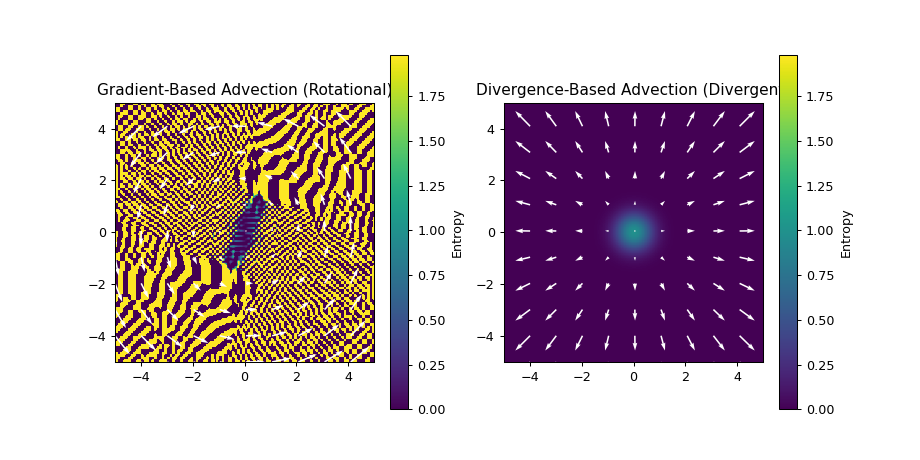

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Grid setup
nx, ny = 100, 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initial entropy field (Gaussian blob)
S = np.exp(-(X**2 + Y**2) / 0.5)

# Vector field for gradient-based advection (rotational: v = [-y, x])
vx_grad = -Y
vy_grad = X

# Vector field for divergence-based advection (divergent: v = [x, y])
vx_div = X
vy_div = Y

# Compute divergence of divergent vector field
div_v = (np.roll(vx_div, -1, axis=0) - np.roll(vx_div, 1, axis=0)) / (2 * dx) + \
        (np.roll(vy_div, -1, axis=1) - np.roll(vy_div, 1, axis=1)) / (2 * dy)

# Time-stepping parameters
dt = 0.005  # Small time step for stability
n_steps = 200  # Sufficient steps for visible evolution

# Arrays to store entropy evolution
S_gradient = S.copy()
S_divergence = S.copy()

# Function to compute gradient-based advection (unchanged, using rotational field)
def advect_gradient(S, vx, vy):
    dS_dx = (np.roll(S, -1, axis=0) - np.roll(S, 1, axis=0)) / (2 * dx)
    dS_dy = (np.roll(S, -1, axis=1) - np.roll(S, 1, axis=1)) / (2 * dy)
    return - (vx * dS_dx + vy * dS_dy)

# Function to compute divergence-based advection
def advect_divergence(S, div_v):
    return - div_v * S

# Animation setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
vmin, vmax = 0, np.max(S) * 2  # Adjusted colormap for visibility
im1 = ax1.imshow(S_gradient, extent=(-5, 5, -5, 5), cmap='viridis', vmin=vmin, vmax=vmax)
im2 = ax2.imshow(S_divergence, extent=(-5, 5, -5, 5), cmap='viridis', vmin=vmin, vmax=vmax)
ax1.set_title('Gradient-Based Advection (Rotational)')
ax2.set_title('Divergence-Based Advection (Divergent)')
fig.colorbar(im1, ax=ax1, label='Entropy')
fig.colorbar(im2, ax=ax2, label='Entropy')

# Overlay vector fields (subsampled for clarity)
skip = 10
ax1.quiver(X[::skip, ::skip], Y[::skip, ::skip], vx_grad[::skip, ::skip], vy_grad[::skip, ::skip], color='white')
ax2.quiver(X[::skip, ::skip], Y[::skip, ::skip], vx_div[::skip, ::skip], vy_div[::skip, ::skip], color='white')

def update(frame):
    global S_gradient, S_divergence
    # Update entropy fields
    S_gradient += dt * advect_gradient(S_gradient, vx_grad, vy_grad)
    S_divergence += dt * advect_divergence(S_divergence, div_v)
    # Update plots
    im1.set_array(S_gradient)
    im2.set_array(S_divergence)
    return [im1, im2]

# Create animation
ani = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)
plt.show()